# LAB 3

# Factor Analysis

Using Airline Satisfaction dataset

In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import numpy as np
#import dataset
data = pd.read_csv(r"C:\Users\HP\Downloads\test.csv (1)\test.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [4]:
#drop null values or missing values from the data
#drop rows
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25893 non-null  int64  
 1   id                                 25893 non-null  int64  
 2   Gender                             25893 non-null  object 
 3   Customer Type                      25893 non-null  object 
 4   Age                                25893 non-null  int64  
 5   Type of Travel                     25893 non-null  object 
 6   Class                              25893 non-null  object 
 7   Flight Distance                    25893 non-null  int64  
 8   Inflight wifi service              25893 non-null  int64  
 9   Departure/Arrival time convenient  25893 non-null  int64  
 10  Ease of Online booking             25893 non-null  int64  
 11  Gate location                      25893 non-null  int

In [5]:
#data preprocessing
#covert string coloumns into integers
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype==np.number:
        continue
    else:
        data[column]=LabelEncoder().fit_transform(data[column])

C:\Users\HP\AppData\Local\Temp/ipykernel_11284/1881275220.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype==np.number:


<AxesSubplot:>

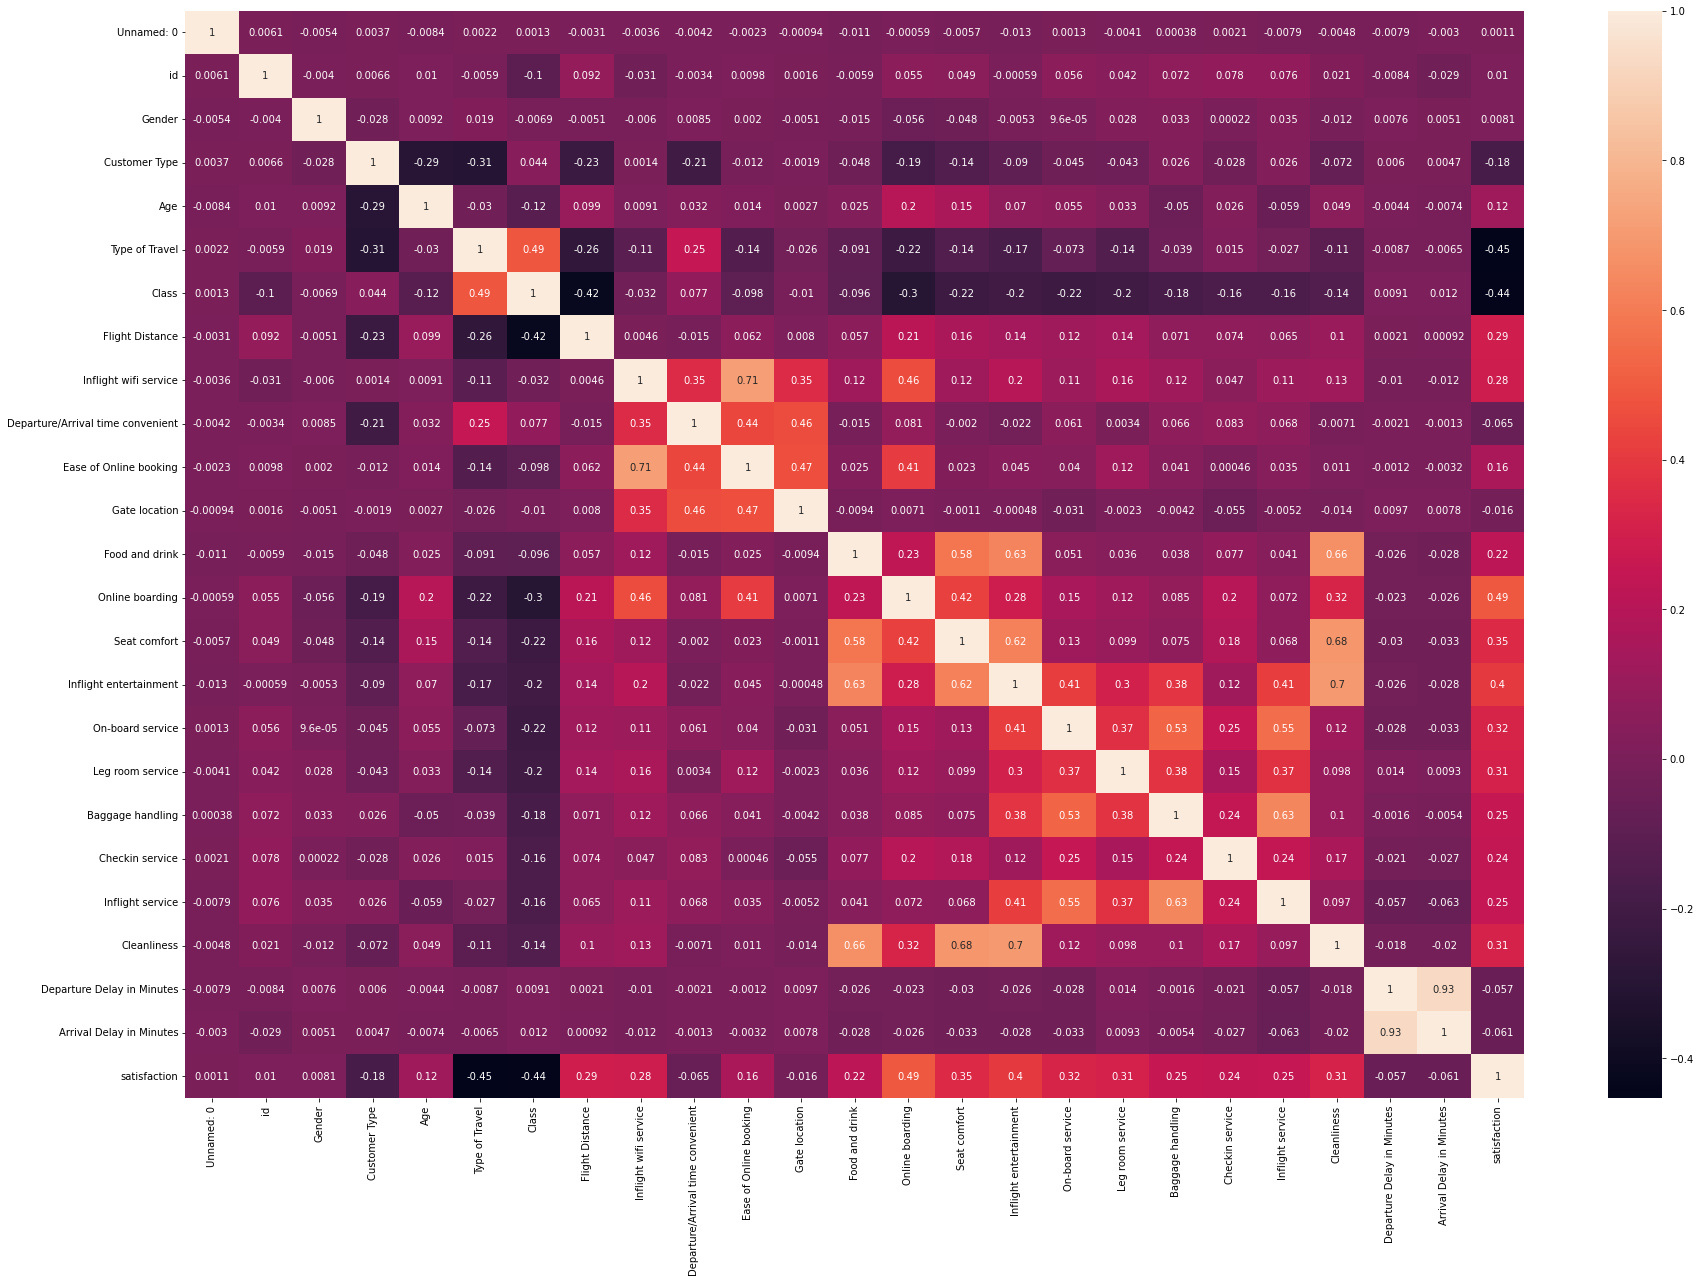

In [15]:
#crete heat map to check the correlation between coloumns
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

In [6]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,3901,0,0,45,0,1,70,5,4,...,5,5,5,4,1,5,5,50,44.0,1
1,1,17896,0,0,29,0,0,2300,1,1,...,4,4,4,3,2,4,5,0,0.0,1
2,2,2502,1,1,13,0,1,95,2,0,...,2,4,1,2,1,2,2,0,0.0,0
3,3,15460,1,0,37,0,0,2740,0,0,...,1,1,1,0,2,1,4,0,6.0,1
4,4,7327,0,0,42,0,1,926,2,3,...,2,2,2,1,3,2,4,0,20.0,1


In [7]:
#adequacy test
#1) Bartlett’s test
#used to test if k samples have equal variances.
#it give two values chi square value and p value
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(260715.1292361053, 0.0)

In [8]:
# 2) kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.
# Value of KMO less than 0.6 is considered inadequate.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_val,kmo=calculate_kmo(data)
kmo

0.7429052352872639

In [9]:
#finding eigen values
fa = FactorAnalyzer()
fa.fit(data)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([4.51922299, 2.42156779, 2.22604881, 1.93634436, 1.83909458,
       1.52509869, 1.05945964, 1.03118657, 0.99710141, 0.97400143,
       0.88436792, 0.81094566, 0.68179442, 0.56247437, 0.49307931,
       0.47496816, 0.42548041, 0.41215736, 0.36319486, 0.31301654,
       0.29387592, 0.28109071, 0.22876482, 0.17476661, 0.07089668])

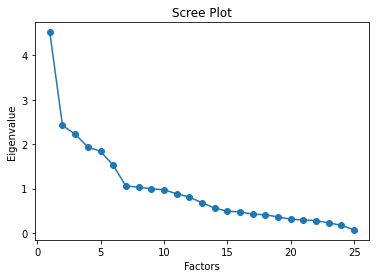

In [10]:
# Create scree plot
import matplotlib.pyplot as plt
plt.scatter(range(1,data.shape[1]+1),eigen_values)
plt.plot(range(1,data.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [11]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(data)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [12]:
fa.loadings_

array([[-9.74939904e-03, -2.30313726e-03, -2.68699506e-03,
         1.28365010e-03, -5.76860777e-03, -2.33478483e-03],
       [-8.43820452e-03,  8.40333988e-02, -1.71062338e-02,
         6.47737206e-02, -1.62425138e-02,  3.76227922e-02],
       [-3.18855601e-02,  4.26435152e-02, -5.81236968e-03,
        -1.98071331e-02,  8.43769650e-03,  1.40531624e-02],
       [-6.32753578e-02, -5.38802313e-02, -4.14717526e-02,
         4.00363433e-02, -4.64697542e-03, -7.91635808e-01],
       [ 5.82352199e-02, -2.17842204e-02,  8.64938114e-03,
         1.42796980e-01, -1.76177154e-03,  3.44384721e-01],
       [-6.35648939e-02,  2.45562441e-02,  4.01485474e-03,
        -7.82160094e-01, -9.38281453e-03,  3.47806116e-01],
       [-6.83388149e-02, -1.97708497e-01,  2.18712889e-02,
        -6.42008814e-01, -6.04399601e-04, -9.92549996e-02],
       [ 3.89471628e-02,  1.01296786e-01, -1.98805788e-02,
         4.31601834e-01,  1.15159087e-02,  2.54440676e-01],
       [ 1.54037490e-01,  9.34271571e-02,  7.577

In [13]:
pd.DataFrame(fa.get_factor_variance(), index = ["Variance", 'P_Variance', 'C_Variance'])

,0,1,2,3,4,5
Variance,2.751673,2.385058,2.120420,2.031930,1.868681,1.137910
P_Variance,0.110067,0.095402,0.084817,0.081277,0.074747,0.045516
C_Variance,0.110067,0.205469,0.290286,0.371563,0.446311,0.491827
